# Tutorial 6:

## Logistic Regression
The Logistic Regression or Logistic Model also called the Logit Model is a classification algorithm that predicts a categorical feature based on a set of independent variables. Logistic Regression is one of the simplest classification algorithms that can be used to predict values for a categorical dependent variable.
 ![Logistic_Regression](images/Logistic.jpeg "Logistic_Regression")
 
 --------------
Logistic Regression is a linear classification algorithm, which basically uses linear regression under the hood. To handle the classification part is uses sigmoid which squashes the continuous outputs of the linear regression between 0-1.

**Some of the key concepts for Logistic Regression is as follows,**
- Sigmoid
- Maximum Likelihood

##### Sigmoid
A sigmoid function is a mathematical function having a characteristic “S”-shaped curve or sigmoid curve. A common example of a sigmoid function is the logistic function shown in the above figure.
 ![sigmoid](images/sigmoid.png "sigmoid")
Using the sigmoid we squash the output of a linear regression model between 0-1. The values between 0-1 are called class probabilities and are used to decide the right class using a threshold value. So, if the predicted probability is less than the threshold it will go to 0 class and vice-versa.
##### Maximum Likelihood
The Maximum Likelihood concept is introduced in Logistic Regression. It basically the error metric for the Logistic Regression model.

As in Linear Regression we are using (actual – predicted) ** 2 metrics to calculate the error and assess the model, whereas in Logistic Regression we use the log of the same metric.

The log is introduced to solve the optimization problem more efficiently and to avoid the local minima problem during the optimization.

**For a deeper understanding of Logistic Regression, use the following resources:**
- [An Introduction to Logistic Regression](https://pdfs.semanticscholar.org/3305/2b1d2363aee3ad290612109dcea0aed2a89e.pdf)
- [Logistic Regression Analysis](https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Logistic_Regression.pdf)
- [Logistic Regression](https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf)

## In this practice session, we will learn to code Logistic Regression Classifier. 
#### We will perform the following steps to build a simple classifier using the popular Iris dataset.

 
 
  - **Data Preprocessing**

    - Importing the libraries.
    - Importing dataset (Dataset Link https://archive.ics.uci.edu/ml/datasets/iris).
    - Dealing with the categorical variable.
    - Classifying dependent and independent variables.
    - Splitting the data into a training set and test set.
    - Feature scaling.
 

  -  **Logistic Regression Classification**

    - Create a Logistic Regression classifier.
    - Feed the training data to the classifier.
    - Predicting the species for the test set.
    - Using the confusion matrix to find accuracy.

## Load the Dependencies


In [5]:
import ipywidgets as widgets
from IPython.display import display
style = {'description_width': 'initial'}
#1 Importing essential libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

## Load the Dataset

In [27]:
from sklearn.datasets import load_iris
iris = load_iris()

# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
dataset = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [28]:
print(f"Dataset has {dataset.shape[0]} rows and {dataset.shape[1]} columns.")

Dataset has 150 rows and 5 columns.


In [29]:
#Plotting the relation between salary and experience
wig_col = widgets.Dropdown(
                options=[col for col in dataset.columns.tolist() if col.startswith(('sepal', 'petal'))],
                description='Choose a Column to Plot vs. Attributes',
                disabled=False,
                layout=widgets.Layout(width='40%', height='40px'),
                style=style)

## Plot Variables

Dropdown(description='Choose a Column to Plot vs. Attributes', layout=Layout(height='40px', width='40%'), opti…

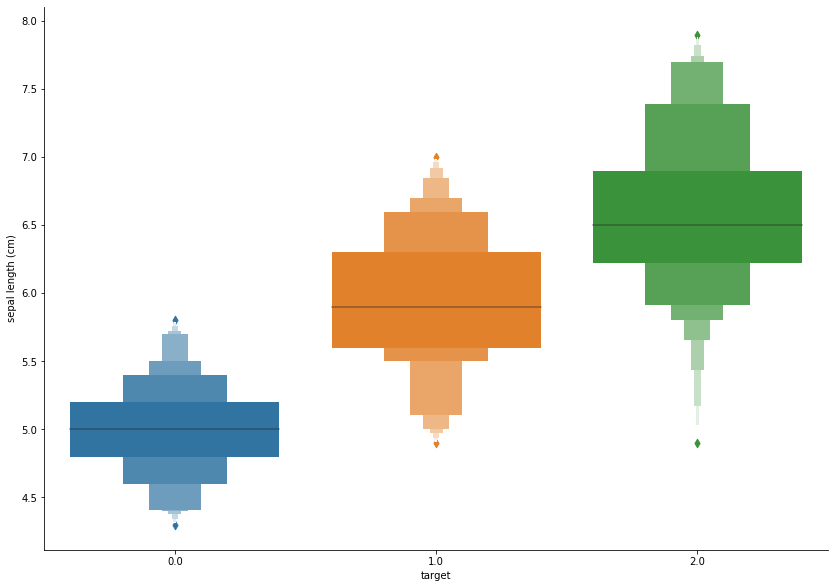

In [30]:
display(wig_col)

sns.catplot(x="target", y=wig_col.value, kind="boxen", data=dataset, height=8.27, aspect=11.7/8.27);

Dropdown(description='Choose a Column to Plot vs. Attributes', layout=Layout(height='40px', width='40%'), opti…

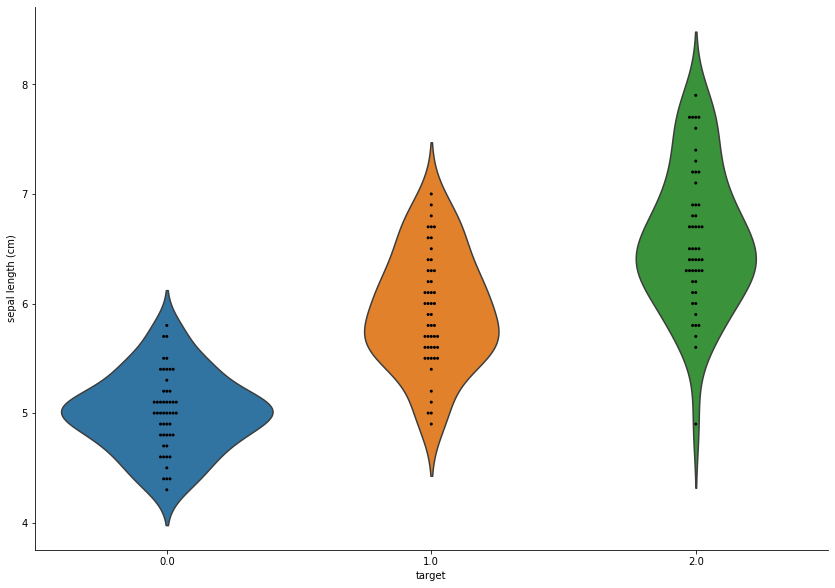

In [31]:
g = sns.catplot(x="target", y=wig_col.value, kind="violin", inner=None, data=dataset, height=8.27, aspect=11.7/8.27)
sns.swarmplot(x="target", y=wig_col.value, color="k", size=3, data=dataset, ax=g.ax);

display(wig_col)

In [32]:
#3 classify dependent and independent variables
X = dataset.iloc[:,:-1].values  #independent variable YearsofExperience
y = dataset.iloc[:,-1].values  #dependent variable salary

In [33]:
print("\nIdependent Variable (Sepal and Petal Attributes):\n\n", X[:5])
print("\nDependent Variable (Species):\n\n", y[:5])


Idependent Variable (Sepal and Petal Attributes):

 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Dependent Variable (Species):

 [0. 0. 0. 0. 0.]


## Encode Classes
 

In [34]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dataset['target'] = labelencoder.fit_transform(dataset['target'])

In [35]:
dataset['target'].unique()

array([0, 1, 2], dtype=int64)

## Create Train and Test Sets

In [36]:
#4 Creating training set and testing set
from sklearn.model_selection import train_test_split
test_size = widgets.FloatSlider(min=0.01, max=0.6, value=0.2, description="Test Size :", tooltips=['Usually 20-30%'])
display(test_size)

FloatSlider(value=0.2, description='Test Size :', max=0.6, min=0.01)

In [37]:
#Divide the dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=test_size.value, random_state = 0) 

In [38]:
print("Training Set :\n----------------\n")
print("X = \n", X_train[:5])
print("y = \n", y_train[:5])

print("\n\nTest Set :\n----------------\n")
print("X = \n",X_test[:5])
print("y = \n", y_test[:5])

Training Set :
----------------

X = 
 [[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]
y = 
 [2. 1. 0. 2. 2.]


Test Set :
----------------

X = 
 [[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]]
y = 
 [2. 1. 0. 2. 0.]


In [39]:
print(f"Shape of Training set is {X_train.shape}")
print(f"Shape of Testing set is {X_test.shape}")

Shape of Training set is (120, 4)
Shape of Testing set is (30, 4)


## Normalise Features
As the Features are not in the range of 0-1, Let's normalize the features using Standard Scaler(Z-score) normalization and Label Encode the Class String Names.

In [40]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

print("\n-------------------------\nDataset after Scaling:\n-------------------------\n", )

print("\nX_train :\n", X_train[:5])
print("-------------------------")
print("\nX_test :\n", X_test[:5])


-------------------------
Dataset after Scaling:
-------------------------


X_train :
 [[ 0.61303014  0.10850105  0.94751783  0.736072  ]
 [-0.56776627 -0.12400121  0.38491447  0.34752959]
 [-0.80392556  1.03851009 -1.30289562 -1.33615415]
 [ 0.25879121 -0.12400121  0.60995581  0.736072  ]
 [ 0.61303014 -0.58900572  1.00377816  1.25412853]]
-------------------------

X_test :
 [[-0.09544771 -0.58900572  0.72247648  1.5131568 ]
 [ 0.14071157 -1.98401928  0.10361279 -0.30004108]
 [-0.44968663  2.66602591 -1.35915595 -1.33615415]
 [ 1.6757469  -0.35650346  1.39760052  0.736072  ]
 [-1.04008484  0.80600783 -1.30289562 -1.33615415]]


## Logistic Regression

In [41]:
# import Logistic Regression library
from sklearn.linear_model import LogisticRegression

# configure params for the model.
penalty_wig = widgets.Dropdown(options=["l2", "l1"], 
                             description="Penalty Type = ", style=style)

display(penalty_wig)

njobs_wig = widgets.Dropdown(options=[('One', 1), ('Two', 2), ('Three', 3), ('All Cores', -1)], 
                             description="Number of CPU Cores = ", style=style)

display(njobs_wig)

c_wig = widgets.Dropdown(options=[1.0, 10.0, 100.0, 1000.0, 10000.0], 
                             description="Penalty parameter C = ", style=style)

display(c_wig)

Dropdown(description='Penalty Type = ', options=('l2', 'l1'), style=DescriptionStyle(description_width='initia…

Dropdown(description='Number of CPU Cores = ', options=(('One', 1), ('Two', 2), ('Three', 3), ('All Cores', -1…

Dropdown(description='Penalty parameter C = ', options=(1.0, 10.0, 100.0, 1000.0, 10000.0), style=DescriptionS…

## Predict and Evaluate the Model

In [44]:
classifier = LogisticRegression(C=c_wig.value, penalty=penalty_wig.value,
                                n_jobs=njobs_wig.value, random_state=0)

#Feed the training data to the classifier
classifier.fit(X_train,y_train)

#Predicting the species for test set
y_pred = classifier.predict(X_test)
def rmlse(y_test, y_pred):
    error = np.square(np.log10(y_pred +1) - np.log10(y_test +1)).mean() ** 0.5
    score = 1 - error
    return score

# Printing the score
print("\n----------------------------\nRMLSE Score = ", rmlse(y_test, y_pred))
print("\nActual vs Predicted Scores \n------------------------------\n")
error_df = pd.DataFrame({"Actual" : y_test,
                         "Predicted" : y_pred,
                         "Abs. Error" : np.abs(y_test - y_pred)})
error_df


----------------------------
RMLSE Score =  1.0

Actual vs Predicted Scores 
------------------------------



,Actual,Predicted,Abs. Error
0,2.0,2.0,0.0
1,1.0,1.0,0.0
2,0.0,0.0,0.0
3,2.0,2.0,0.0
4,0.0,0.0,0.0
5,2.0,2.0,0.0
6,0.0,0.0,0.0
7,1.0,1.0,0.0
8,1.0,1.0,0.0
9,1.0,1.0,0.0


## Actual vs. Predicted

In [46]:
#Using confusion matrix to find the accuracy
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)

accuracy = cm.diagonal().sum()/cm.sum()

print("\n---------------------------\n")
print("Accuracy of Predictions = ",accuracy)

print("\n---------------------------\n")
print(classification_report(y_test, y_pred))


---------------------------

Accuracy of Predictions =  1.0

---------------------------

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

